In [1]:
#NLP Fundamentals in Tensorflow

In [2]:
!nvidia -smi -L

/bin/bash: line 1: nvidia: command not found


In [3]:
#getting helper functions
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2023-08-10 01:56:17--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-08-10 01:56:17 (71.2 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [4]:
from helper_functions import unzip_data,create_tensorboard_callback,plot_loss_curves,compare_historys

In [5]:
#using Kaggle's introduction to NLP dataset(text samples of tweets labelled disaster or not)
!wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
unzip_data("nlp_getting_started.zip")

--2023-08-10 01:56:28--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 74.125.195.128, 172.253.117.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.007s  

2023-08-10 01:56:28 (81.0 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



In [6]:
import pandas as pd
train_df=pd.read_csv("train.csv")
test_df=pd.read_csv("test.csv")
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [7]:
#shuffling the training dataset
train_df_shuffled=train_df.sample(frac=1,random_state=42)
train_df_shuffled

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0
...,...,...,...,...,...
5226,7470,obliteration,Merica!,@Eganator2000 There aren't many Obliteration s...,0
5390,7691,panic,NaN,just had a panic attack bc I don't have enough...,0
860,1242,blood,NaN,Omron HEM-712C Automatic Blood Pressure Monito...,0
7603,10862,NaN,NaN,Officials say a quarantine is in place at an A...,1


In [8]:
#test dataset
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [9]:
#number of examples in each class
train_df.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [10]:
#Amount of training and testing data
len(train_df),len(test_df)

(7613, 3263)

In [11]:
#let's visualise some training examples
import random
random_index=random.randint(0,len(train_df)-5)
for row in train_df_shuffled[["text","target"]][random_index:random_index+5].itertuples():
  _,text,target=row
  print(f"Target:{target}","(Real disaster)" if target>0 else "(not a real disaster)")
  print(f"Text:\n{text}\n")
  print("---\n")

Target:1 (Real disaster)
Text:
What is this? Like I could be in danger or something

---

Target:0 (not a real disaster)
Text:
I can't bloody wait!! Sony Sets a Date For Stephen KingÛªs Û÷The Dark TowerÛª #stephenking #thedarktower http://t.co/J9LPdRXCDE  @bdisgusting

---

Target:1 (Real disaster)
Text:
@blairmcdougall and when will you be commenting on Ian Taylor's dealings with mass - murderer Arkan?

---

Target:1 (Real disaster)
Text:
When ur friend and u are talking about forest fires in a forest and he tells u to drop ur mix tape out there... #straightfire

---

Target:1 (Real disaster)
Text:
@WaseemBadami Condemning of Deaths More than 1000 due to Heat Wave in Karachi. 
May Allah gv Patience to their Heirs. http://t.co/iTG84q7vIi

---



In [12]:
#split data into training and validation datasets
from sklearn.model_selection import train_test_split
train_sentences,val_sentences,train_labels,val_labels=train_test_split(train_df_shuffled["text"].to_numpy(),
                                                                       train_df_shuffled["target"].to_numpy(),
                                                                       test_size=0.1,
                                                                       random_state=42)

In [13]:
#check the lengths
len(train_sentences),len(val_sentences),len(train_labels),len(val_labels)

(6851, 762, 6851, 762)

In [14]:
#check first 10 samples
train_sentences[:10],train_labels[:10]

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object),
 array([0,

In [15]:
#text vectorization(tokenization)
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

In [16]:
text_vectorizer=TextVectorization(max_tokens=None,#how many words in the vocabulary(automatically add<OOV>)
                                  standardize="lower_and_strip_punctuation",
                                  split="whitespace",
                                  ngrams=None,
                                  output_mode="int",#how to map tokens
                                  output_sequence_length=None,#how long do you want your sequence to be
                                  pad_to_max_tokens=False)

In [17]:
#finding average number of tokens(words) in the training tweets
round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))

15

In [18]:
#setup text vectorization variables
max_vocab_length=10000#maximum number of wrods in our vocabulary
max_length=15#max length our sequences will be
text_vectorizer=TextVectorization(max_tokens=max_vocab_length,
                                  output_mode="int",
                                  output_sequence_length=max_length)

In [19]:
#fit the text vectorizer to the training data
text_vectorizer.adapt(train_sentences)

In [20]:
#create a sample sentence and tokenize it
sample_sentence="There is a flood in my street!"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[ 74,   9,   3, 232,   4,  13, 698,   0,   0,   0,   0,   0,   0,
          0,   0]])>

In [21]:
#Choose a random sentence from training dataset and tokenize it
random_sentence=random.choice(train_sentences)
print(f"Original text:\n{random_sentence}\n")
print(f"Vectorized Version:\n{text_vectorizer([random_sentence])}")

Original text:
Ted Cruz fires back at Jeb &amp; Bush: ÛÏWe lose because of Republicans like Jeb &amp; Mitt.Û [Video] -  http://t.co/BFTHaHLCr0

Vectorized Version:
[[2264 1534  109   88   17 1828   35  657 3227 1505  152    6 2004   25
  1828]]


In [22]:
#getting unique words in a vocabulary
words_in_vocab=text_vectorizer.get_vocabulary()
top_5_words=words_in_vocab[:5]
bottom_5_words=words_in_vocab[-5:]
print(f"Number of words in vocab:{len(words_in_vocab)}")
print(f"5 most common words:{top_5_words}")
print(f"5 least common words:{bottom_5_words}")

Number of words in vocab:10000
5 most common words:['', '[UNK]', 'the', 'a', 'in']
5 least common words:['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1']


In [23]:
from tensorflow.keras import layers
embedding=layers.Embedding(input_dim=max_vocab_length,
                           output_dim=128,
                           input_length=max_length)
embedding

In [24]:
random_sentecne=random.choice(train_sentences)
print(f"Original Text:\n{random_sentence}\n")
print(f"Embedded Version:")
sample_embed=embedding(text_vectorizer([random_sentence]))
sample_embed

Original Text:
Ted Cruz fires back at Jeb &amp; Bush: ÛÏWe lose because of Republicans like Jeb &amp; Mitt.Û [Video] -  http://t.co/BFTHaHLCr0

Embedded Version:


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[-0.01148712, -0.03952605,  0.04945761, ...,  0.01627088,
          0.02894253, -0.04606741],
        [ 0.00438943, -0.00203534,  0.02685134, ...,  0.04227403,
         -0.01371723,  0.02044571],
        [ 0.03418529, -0.03009651,  0.0270146 , ...,  0.00424927,
          0.02698066, -0.00126426],
        ...,
        [ 0.02434937,  0.00762458, -0.02683361, ...,  0.02736199,
          0.04845439, -0.02755123],
        [-0.02849483, -0.01810098, -0.00386144, ..., -0.04093578,
          0.00636891, -0.04432535],
        [ 0.0423683 ,  0.04598433,  0.0078042 , ...,  0.03420601,
         -0.00999147, -0.02045109]]], dtype=float32)>

In [25]:
#check out a single token embedding
sample_embed[0][0],sample_embed[0][0].shape,random_sentence

(<tf.Tensor: shape=(128,), dtype=float32, numpy=
 array([-0.01148712, -0.03952605,  0.04945761,  0.04053599, -0.02715298,
         0.03742418,  0.03885895,  0.02644898, -0.03709435,  0.01999423,
        -0.01277937,  0.00845193, -0.0199073 ,  0.02469401,  0.03866715,
         0.03398547, -0.03836394, -0.01805406, -0.0103892 ,  0.03025396,
        -0.01059811,  0.00933325,  0.03622541,  0.02628068,  0.00694149,
         0.01345749,  0.04272013,  0.00110251, -0.02409426,  0.02633091,
         0.02279497, -0.02663248, -0.00922995, -0.02733172,  0.0434511 ,
        -0.02208728, -0.02930015, -0.04509745, -0.00762315, -0.03009596,
         0.02427832,  0.03869649,  0.01128381, -0.0482549 , -0.00654741,
        -0.00552251,  0.0216002 ,  0.00585604, -0.03809807,  0.04028428,
        -0.02080042,  0.00443695, -0.04839349, -0.01974493, -0.01089202,
         0.00503616, -0.03420149, -0.0281866 , -0.04499707, -0.03026226,
         0.03915128, -0.02317647, -0.02229674, -0.00505526,  0.01731935,
  

In [26]:
#Model 0:Baseline model using naive bayes Tf-idf vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

#create tokenization and piepline
model_0=Pipeline([
    ("tfisf",TfidfVectorizer()),#convert words to numbers
    ("clf",MultinomialNB())#model the text
])
model_0.fit(train_sentences,train_labels)

Pipeline(steps=[('tfisf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [27]:
#Evaluate base model
baseline_score=model_0.score(val_sentences,val_labels)
baseline_score

0.7926509186351706

In [28]:
#Make predictions
baseline_preds=model_0.predict(val_sentences)
baseline_preds[:20]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

In [29]:
train_labels[:20]

array([0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0])

In [30]:
#function to evaluate a model based on accuracy,precision,recall and F1-score
from sklearn.metrics import accuracy_score,precision_recall_fscore_support
def calculate_results(y_true,y_preds):
  model_accuracy=accuracy_score(y_true,y_preds)*100
  #calculating model precison,recall and f1 score using weighted average
  model_precision,model_recall,model_f1,_=precision_recall_fscore_support(y_true,y_preds,average="weighted")
  model_results={"accuracy":model_accuracy,
                 "precision":model_precision,
                 "recall":model_recall,
                 "f1":model_f1}
  return model_results

In [31]:
#get baseline model results
baseline_results=calculate_results(val_labels,baseline_preds)
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

In [32]:
#Model 1:A simple dense model

In [33]:
#create a tensorboard callback
from helper_functions import create_tensorboard_callback
#create a directory to save tensorboard logs
SAVE_DIR="model_logs"

In [34]:
#Build model with functional API
from tensorflow.keras import layers
inputs=layers.Input(shape=(1,),dtype=tf.string)#inputs are one dimensional strings
x=text_vectorizer(inputs)
x=embedding(x)
x=layers.GlobalAveragePooling1D()(x) # condense the feature vector for each token to one vector
outputs=layers.Dense(1,activation="sigmoid")(x)
model_1=tf.keras.Model(inputs,outputs,name="model_1_dense")

In [35]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [36]:
#compile the model
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [37]:
#fit the model
model_1_history=model_1.fit(x=train_sentences,
                            y=train_labels,
                            epochs=5,
                            validation_data=(val_sentences,val_labels),
                            callbacks=[create_tensorboard_callback(SAVE_DIR,"model_1_dense")]
                            )

Saving TensorBoard log files to: model_logs/model_1_dense/20230810-015634
Epoch 1/5
215/215 [==============================] - 12s 41ms/step - loss: 0.6116 - accuracy: 0.6974 - val_loss: 0.5408 - val_accuracy: 0.7454
Epoch 2/5
215/215 [==============================] - 9s 42ms/step - loss: 0.4417 - accuracy: 0.8184 - val_loss: 0.4709 - val_accuracy: 0.7835
Epoch 3/5
215/215 [==============================] - 7s 34ms/step - loss: 0.3474 - accuracy: 0.8593 - val_loss: 0.4619 - val_accuracy: 0.7887
Epoch 4/5
215/215 [==============================] - 5s 21ms/step - loss: 0.2846 - accuracy: 0.8926 - val_loss: 0.4628 - val_accuracy: 0.7887
Epoch 5/5
215/215 [==============================] - 5s 22ms/step - loss: 0.2375 - accuracy: 0.9120 - val_loss: 0.4850 - val_accuracy: 0.7887


In [38]:
model_1.evaluate(val_sentences,val_labels)

24/24 [==============================] - 0s 2ms/step - loss: 0.4850 - accuracy: 0.7887


[0.48496463894844055, 0.7887139320373535]

In [39]:
model_1_pred_probs=model_1.predict(val_sentences)
model_1_pred_probs.shape

24/24 [==============================] - 0s 2ms/step


(762, 1)

In [40]:
#first 10 probability predictions
model_1_pred_probs[:10]

array([[0.3248884 ],
       [0.782416  ],
       [0.9976556 ],
       [0.11859124],
       [0.11670708],
       [0.93942314],
       [0.90777516],
       [0.99254775],
       [0.96352434],
       [0.2779889 ]], dtype=float32)

In [41]:
#convert mmodel prediction probabilites to label format
model_1_preds=tf.squeeze(tf.round(model_1_pred_probs))
model_1_preds[:20]

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0.], dtype=float32)>

In [42]:
model_1_results=calculate_results(val_labels,model_1_preds)
model_1_results

{'accuracy': 78.87139107611549,
 'precision': 0.7948464726843409,
 'recall': 0.7887139107611548,
 'f1': 0.7853694687698636}

In [43]:
import numpy as np
np.array(list(model_1_results.values()))>np.array(list(baseline_results.values()))

array([False, False, False, False])

In [44]:
#visualising learned embeddings
words_in_vocab=text_vectorizer.get_vocabulary()
len(words_in_vocab),words_in_vocab[:10]

(10000, ['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is'])

In [45]:
#getting the weight matrix of the embedding layer
embed_weights=model_1.get_layer("embedding").get_weights()[0]
embed_weights

array([[ 6.7683995e-02, -3.2059032e-02,  1.9586191e-02, ...,
         3.1002061e-02,  2.4041576e-02, -2.3115011e-02],
       [ 2.0821296e-02,  3.0067386e-03,  3.7740041e-02, ...,
        -3.5809830e-02, -2.7436139e-02, -3.9104704e-02],
       [-2.2334205e-02,  1.1289218e-02, -1.4731770e-02, ...,
         1.6824538e-02, -4.2798016e-03,  1.3319481e-02],
       ...,
       [ 3.8658869e-02,  4.4635225e-02,  3.6597442e-02, ...,
        -8.2712397e-03,  1.9142237e-02,  5.6970865e-05],
       [ 6.4072601e-02,  7.5241402e-02,  7.2930284e-02, ...,
         2.5403524e-02, -8.5387126e-02,  4.2782505e-03],
       [ 2.0010017e-02,  5.2782029e-02,  2.0922821e-02, ...,
         9.8192997e-02, -1.0174549e-01,  7.7246241e-02]], dtype=float32)

In [46]:
#tensorflow projection tools
import io
out_v = io.open('vectors.tsv', 'w', encoding='utf-8')
out_m = io.open('metadata.tsv', 'w', encoding='utf-8')

for index, word in enumerate(words_in_vocab):
  if index == 0:
    continue  # skip 0, it's padding.
  vec = embed_weights[index]
  out_v.write('\t'.join([str(x) for x in vec]) + "\n")
  out_m.write(word + "\n")
out_v.close()
out_m.close()

In [47]:
try:
  from google.colab import files
  files.download('vectors.tsv')
  files.download('metadata.tsv')
except Exception:
  pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [48]:
#Model 2:Long short term memory model(LSTM)
from tensorflow.keras import layers
inputs=layers.Input(shape=(1,),dtype=tf.string)
x=text_vectorizer(inputs)
x=embedding(x)
x=layers.LSTM(units=64,return_sequences=True)(x)
x=layers.LSTM(64)(x)
x=layers.Dense(64,activation="relu")(x)
outputs=layers.Dense(1,activation="sigmoid")(x)
model_2=tf.keras.Model(inputs,outputs,name="model_2_LSTM")

In [49]:
model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 15, 64)            49408     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                      

In [50]:
#compiling the LSTM
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["Accuracy"])

In [51]:
#fitting the LSTM
model_2_history=model_2.fit(x=train_sentences,
                            y=train_labels,
                            epochs=5,
                            validation_data=(val_sentences,val_labels),
                            callbacks=[create_tensorboard_callback(SAVE_DIR,"model_2_LSTM")])

Saving TensorBoard log files to: model_logs/model_2_LSTM/20230810-015721
Epoch 1/5
215/215 [==============================] - 17s 51ms/step - loss: 0.2289 - Accuracy: 0.9219 - val_loss: 0.5396 - val_Accuracy: 0.7782
Epoch 2/5
215/215 [==============================] - 9s 43ms/step - loss: 0.1591 - Accuracy: 0.9397 - val_loss: 0.6144 - val_Accuracy: 0.7795
Epoch 3/5
215/215 [==============================] - 10s 48ms/step - loss: 0.1313 - Accuracy: 0.9510 - val_loss: 0.7517 - val_Accuracy: 0.7769
Epoch 4/5
215/215 [==============================] - 10s 48ms/step - loss: 0.1089 - Accuracy: 0.9591 - val_loss: 0.7215 - val_Accuracy: 0.7795
Epoch 5/5
215/215 [==============================] - 10s 47ms/step - loss: 0.0887 - Accuracy: 0.9631 - val_loss: 0.8133 - val_Accuracy: 0.7782


In [52]:
model_2_pred_probs=model_2.predict(val_sentences)
model_2_pred_probs[:10]

24/24 [==============================] - 1s 9ms/step


array([[3.2338463e-02],
       [8.0529225e-01],
       [9.9997401e-01],
       [1.5229416e-01],
       [6.1315508e-04],
       [9.9975514e-01],
       [9.8424923e-01],
       [9.9998987e-01],
       [9.9996668e-01],
       [3.2514659e-01]], dtype=float32)

In [53]:
#convert model_2 prediction probabilites to labels
model_2_preds=tf.squeeze(tf.round(model_2_pred_probs))
model_2_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [54]:
model_2_results=calculate_results(val_labels,model_2_preds)
model_2_results

{'accuracy': 77.82152230971128,
 'precision': 0.7804499491198106,
 'recall': 0.7782152230971129,
 'f1': 0.7760126933653841}

In [55]:
from tensorflow.keras import layers
inputs=layers.Input(shape=(1,),dtype=tf.string)
x=text_vectorizer(inputs)
x=embedding(x)
x=layers.GRU(64)(x)
outputs=layers.Dense(1,activation="sigmoid")(x)
model_3=tf.keras.Model(inputs,outputs,name="Model_3_GRU")

In [56]:
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [57]:
model_3_history=model_3.fit(x=train_sentences,
                            y=train_labels,
                            epochs=5,
                            validation_data=(val_sentences,val_labels),
                            callbacks=[create_tensorboard_callback(SAVE_DIR,"model_3_GRU")])

Saving TensorBoard log files to: model_logs/model_3_GRU/20230810-015850
Epoch 1/5
215/215 [==============================] - 12s 41ms/step - loss: 0.1649 - accuracy: 0.9361 - val_loss: 0.7188 - val_accuracy: 0.7743
Epoch 2/5
215/215 [==============================] - 9s 43ms/step - loss: 0.0886 - accuracy: 0.9669 - val_loss: 0.7378 - val_accuracy: 0.7795
Epoch 3/5
215/215 [==============================] - 9s 41ms/step - loss: 0.0746 - accuracy: 0.9717 - val_loss: 0.9584 - val_accuracy: 0.7664
Epoch 4/5
215/215 [==============================] - 8s 37ms/step - loss: 0.0632 - accuracy: 0.9734 - val_loss: 0.9652 - val_accuracy: 0.7730
Epoch 5/5
215/215 [==============================] - 8s 37ms/step - loss: 0.0547 - accuracy: 0.9772 - val_loss: 1.0202 - val_accuracy: 0.7703


In [58]:
model_3_pred_probs=model_3.predict(val_sentences)
model_3_pred_probs[:10]

24/24 [==============================] - 1s 5ms/step


array([[2.8728565e-02],
       [8.4155905e-01],
       [9.9983257e-01],
       [2.6448071e-01],
       [1.5406575e-04],
       [9.9937034e-01],
       [7.5556403e-01],
       [9.9989837e-01],
       [9.9983901e-01],
       [8.8324499e-01]], dtype=float32)

In [59]:
model_3_preds=tf.squeeze(tf.round(model_3_pred_probs))
model_3_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [60]:
model_3_results=calculate_results(val_labels,model_3_preds)
model_3_results

{'accuracy': 77.03412073490814,
 'precision': 0.7705174165815669,
 'recall': 0.7703412073490814,
 'f1': 0.7691322758419059}

In [61]:
#Model 4:Bidirectional RNN
from tensorflow.keras import layers
inputs=layers.Input(shape=(1,),dtype="string")
x=text_vectorizer(inputs)
x=embedding(x)
x=layers.Bidirectional(layers.LSTM(64,return_sequences=True))(x)
x=layers.Bidirectional(layers.GRU(64))(x)
outputs=layers.Dense(1,activation="sigmoid")(x)
model_4=tf.keras.Model(inputs,outputs,name="Model_4_bidirectional")

In [62]:
model_4.summary()

Model: "Model_4_bidirectional"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 bidirectional (Bidirectiona  (None, 15, 128)          98816     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              74496     
 nal)                                                            
                                             

In [63]:
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [64]:
#fit the model
model_4_history=model_4.fit(x=train_sentences,
                            y=train_labels,
                            epochs=5,
                            validation_data=(val_sentences,val_labels),
                            callbacks=[create_tensorboard_callback(SAVE_DIR,"model_4_bidirectional")])

Saving TensorBoard log files to: model_logs/model_4_bidirectional/20230810-020018
Epoch 1/5
215/215 [==============================] - 28s 83ms/step - loss: 0.0962 - accuracy: 0.9710 - val_loss: 0.7649 - val_accuracy: 0.7782
Epoch 2/5
215/215 [==============================] - 15s 70ms/step - loss: 0.0539 - accuracy: 0.9764 - val_loss: 1.2415 - val_accuracy: 0.7651
Epoch 3/5
215/215 [==============================] - 15s 68ms/step - loss: 0.0463 - accuracy: 0.9774 - val_loss: 1.4683 - val_accuracy: 0.7507
Epoch 4/5
215/215 [==============================] - 15s 68ms/step - loss: 0.0467 - accuracy: 0.9784 - val_loss: 1.3288 - val_accuracy: 0.7743
Epoch 5/5
215/215 [==============================] - 15s 69ms/step - loss: 0.0414 - accuracy: 0.9806 - val_loss: 1.5828 - val_accuracy: 0.7651


In [65]:
model_4_pred_probs=model_4.predict(val_sentences)
model_4_pred_probs[:10]

24/24 [==============================] - 2s 13ms/step


array([[9.8718949e-02],
       [8.6333883e-01],
       [9.9998766e-01],
       [2.3572022e-01],
       [7.6955803e-06],
       [9.9991661e-01],
       [9.0387696e-01],
       [9.9999470e-01],
       [9.9998993e-01],
       [9.9957049e-01]], dtype=float32)

In [66]:
model_4_preds=tf.squeeze(tf.round(model_4_pred_probs))
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [67]:
model_4_results=calculate_results(val_labels,model_4_preds)
model_4_results

{'accuracy': 76.50918635170603,
 'precision': 0.7647692804612646,
 'recall': 0.7650918635170604,
 'f1': 0.7643429612523406}

In [68]:
embedding_test=embedding(text_vectorizer(["this is a test sentence"]))
conv_1d=layers.Conv1D(filters=32,
                      kernel_size=5,
                      activation="relu",
                      padding="valid")
conv_1d_output=conv_1d(embedding_test)
max_pool=layers.GlobalMaxPool1D()
max_pool_output=max_pool(conv_1d_output)
embedding_test.shape,conv_1d_output.shape,max_pool_output.shape

(TensorShape([1, 15, 128]), TensorShape([1, 11, 32]), TensorShape([1, 32]))

In [74]:
#Model 5:1D CNN Model
from tensorflow.keras import layers
inputs=layers.Input(shape=(1,),dtype="string")
x=text_vectorizer(inputs)
x=embedding(x)
x=layers.Conv1D(filters=64,kernel_size=5,activation="relu",padding="valid")(x)
x=layers.GlobalMaxPool1D()(x)
outputs=layers.Dense(1,activation="sigmoid")(x)
model_5=tf.keras.Model(inputs,outputs,name="model_5_COnv1D")

In [75]:
model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [76]:
model_5.summary()

Model: "model_5_COnv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 conv1d_6 (Conv1D)           (None, 11, 64)            41024     
                                                                 
 global_max_pooling1d_5 (Glo  (None, 64)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_6 (Dense)             (None, 1)              

In [77]:
#fit the model
model_5_history=model_5.fit(x=train_sentences,
                            y=train_labels,
                            epochs=5,
                            validation_data=(val_sentences,val_labels),
                            callbacks=[create_tensorboard_callback(SAVE_DIR,"Model_5_Conv1D")])

Saving TensorBoard log files to: model_logs/Model_5_Conv1D/20230810-022203
Epoch 1/5
215/215 [==============================] - 8s 30ms/step - loss: 0.1226 - accuracy: 0.9585 - val_loss: 0.9111 - val_accuracy: 0.7703
Epoch 2/5
215/215 [==============================] - 6s 26ms/step - loss: 0.0727 - accuracy: 0.9745 - val_loss: 1.0827 - val_accuracy: 0.7703
Epoch 3/5
215/215 [==============================] - 7s 32ms/step - loss: 0.0593 - accuracy: 0.9771 - val_loss: 1.0975 - val_accuracy: 0.7625
Epoch 4/5
215/215 [==============================] - 6s 28ms/step - loss: 0.0543 - accuracy: 0.9772 - val_loss: 1.1618 - val_accuracy: 0.7612
Epoch 5/5
215/215 [==============================] - 8s 37ms/step - loss: 0.0513 - accuracy: 0.9794 - val_loss: 1.1861 - val_accuracy: 0.7625


In [79]:
model_5_pred_probs=model_5.predict(val_sentences)
model_5_pred_probs[:10]

24/24 [==============================] - 0s 5ms/step


array([[1.9821164e-01],
       [9.4190902e-01],
       [9.9966472e-01],
       [7.7854231e-02],
       [2.3879900e-07],
       [9.8730582e-01],
       [9.3913096e-01],
       [9.9971551e-01],
       [9.9999940e-01],
       [9.0462941e-01]], dtype=float32)

In [81]:
model_5_preds=tf.squeeze(tf.round(model_5_pred_probs))
model_5_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [82]:
model_5_results=calculate_results(val_labels,model_5_preds)
model_5_results

{'accuracy': 76.24671916010499,
 'precision': 0.7629611993882945,
 'recall': 0.7624671916010499,
 'f1': 0.7608791530897157}

In [83]:
#Model 6:Tensorflow Hub Pretrained Sentence Encoder
import tensorflow_hub as hub
embed=hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
embed_samples=embed([sample_sentence,"sample sentence"])
print(embed_samples[0][:50])

tf.Tensor(
[[-0.01602833  0.01068852  0.02425469 ...  0.00800524  0.02877095
  -0.01427996]
 [-0.03938253  0.00283755  0.0224392  ... -0.05952223 -0.03717029
   0.0103699 ]], shape=(2, 512), dtype=float32)


In [97]:
#create a keras layer using the USE pretrained layer
sentence_encoder_layer=hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                      input_shape=[],
                                      dtype=tf.string,
                                      trainable=False,
                                      name="USE")
model_6=tf.keras.Sequential([
    sentence_encoder_layer,
    layers.Dense(64,activation="relu"),
    layers.Dense(1,activation="sigmoid")
],name="model_6_USE")

In [98]:
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [99]:
model_6.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_8 (Dense)             (None, 64)                32832     
                                                                 
 dense_9 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [100]:
model_6_history=model_6.fit(x=train_sentences,
                            y=train_labels,
                            epochs=5,
                            validation_data=(val_sentences,val_labels),
                            callbacks=[create_tensorboard_callback(SAVE_DIR,"Model_6_USE")])

Saving TensorBoard log files to: model_logs/Model_6_USE/20230810-025239
Epoch 1/5
215/215 [==============================] - 7s 17ms/step - loss: 0.5090 - accuracy: 0.7813 - val_loss: 0.4513 - val_accuracy: 0.7979
Epoch 2/5
215/215 [==============================] - 5s 23ms/step - loss: 0.4150 - accuracy: 0.8136 - val_loss: 0.4482 - val_accuracy: 0.8071
Epoch 3/5
215/215 [==============================] - 4s 21ms/step - loss: 0.4022 - accuracy: 0.8212 - val_loss: 0.4360 - val_accuracy: 0.8071
Epoch 4/5
215/215 [==============================] - 3s 15ms/step - loss: 0.3935 - accuracy: 0.8237 - val_loss: 0.4293 - val_accuracy: 0.8136
Epoch 5/5
215/215 [==============================] - 5s 25ms/step - loss: 0.3869 - accuracy: 0.8327 - val_loss: 0.4288 - val_accuracy: 0.8123


In [101]:
model_6_pred_probs=model_6.predict(val_sentences)
model_6_pred_probs[:10]

24/24 [==============================] - 1s 13ms/step


array([[0.20223257],
       [0.7818477 ],
       [0.98548245],
       [0.20289585],
       [0.78107095],
       [0.7204615 ],
       [0.98012596],
       [0.9818682 ],
       [0.91717356],
       [0.09140252]], dtype=float32)

In [102]:
model_6_preds=tf.squeeze(tf.round(model_6_pred_probs))
model_6_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [103]:
model_6_results=calculate_results(val_labels,model_6_preds)
model_6_results

{'accuracy': 81.23359580052494,
 'precision': 0.812763224356635,
 'recall': 0.8123359580052494,
 'f1': 0.8115121319063344}

In [104]:
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

In [106]:
#Model 7 TF Hub Pretrained USE but with 10%of training data
#create subsets of 10% of training data
#NOTE:Splitting data like this causes data leakage
# train_10_percent=train_df_shuffled[["text","target"]].sample(frac=0.1,random_state=42)
# train_sentences_10_percent=train_10_percent["text"].to_list()
# train_labels_10_percent=train_10_percent["target"].to_list()

In [134]:
train_10_precent_split=int(0.1*len(train_sentences))
train_sentences_10_percent=train_sentences[:train_10_precent_split]
train_labels_10_percent=train_labels[:train_10_precent_split]

In [135]:
pd.Series(np.array(train_labels_10_percent)).value_counts()

0    406
1    279
dtype: int64

In [139]:
# model_7=tf.keras.models.clone_model(model_6)
model_7=tf.keras.Sequential([
    sentence_encoder_layer,
    layers.Dense(64,activation="relu"),
    layers.Dense(1,activation="sigmoid")
],name="model_7_USE_10_percent")

In [140]:
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [141]:
model_7.summary()

Model: "model_7_USE_10_percent"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_16 (Dense)            (None, 64)                32832     
                                                                 
 dense_17 (Dense)            (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [142]:
model_7_history=model_7.fit(train_sentences_10_percent,
                            train_labels_10_percent,
                            epochs=5,
                            validation_data=(val_sentences,val_labels),
                            callbacks=[create_tensorboard_callback(SAVE_DIR,"model_7_USE_10_percent_correct_split")])

Saving TensorBoard log files to: model_logs/model_7_USE_10_percent_correct_split/20230810-034344
Epoch 1/5
22/22 [==============================] - 7s 71ms/step - loss: 0.6704 - accuracy: 0.7036 - val_loss: 0.6499 - val_accuracy: 0.7323
Epoch 2/5
22/22 [==============================] - 1s 30ms/step - loss: 0.5987 - accuracy: 0.8058 - val_loss: 0.5912 - val_accuracy: 0.7782
Epoch 3/5
22/22 [==============================] - 1s 31ms/step - loss: 0.5230 - accuracy: 0.8190 - val_loss: 0.5359 - val_accuracy: 0.7743
Epoch 4/5
22/22 [==============================] - 1s 32ms/step - loss: 0.4618 - accuracy: 0.8277 - val_loss: 0.5038 - val_accuracy: 0.7677
Epoch 5/5
22/22 [==============================] - 1s 31ms/step - loss: 0.4214 - accuracy: 0.8307 - val_loss: 0.4898 - val_accuracy: 0.7808


In [143]:
model_7_pred_probs=model_7.predict(val_sentences)
model_7_pred_probs[:10]

24/24 [==============================] - 1s 15ms/step


array([[0.2251809 ],
       [0.6202548 ],
       [0.9287803 ],
       [0.37096986],
       [0.5053252 ],
       [0.7017165 ],
       [0.897206  ],
       [0.80604875],
       [0.85712224],
       [0.1638836 ]], dtype=float32)

In [144]:
model_7_preds=tf.squeeze(tf.round(model_7_pred_probs))
model_7_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [145]:
model_7_results=calculate_results(val_labels,model_7_preds)
model_7_results

{'accuracy': 78.08398950131233,
 'precision': 0.7813169326988488,
 'recall': 0.7808398950131233,
 'f1': 0.7795856165810638}

In [146]:
model_6_results

{'accuracy': 81.23359580052494,
 'precision': 0.812763224356635,
 'recall': 0.8123359580052494,
 'f1': 0.8115121319063344}

In [151]:
#compare performance of each of our models
#combine model results into a dataframe
all_models_results=pd.DataFrame({"0_baseline":baseline_results,
                                 "1_simpleDense":model_1_results,
                                 "2_LSTM":model_2_results,
                                 "3_GRU":model_3_results,
                                 "4_Bidirectional":model_4_results,
                                 "5_Conv1D":model_5_results,
                                 "6_USE":model_6_results,
                                 "7_USE_10_percent":model_7_results})
all_models_results=all_models_results.transpose()

In [152]:
all_models_results["accuracy"]=all_models_results["accuracy"]/100

In [153]:
all_models_results

,accuracy,precision,recall,f1
0_baseline,0.792651,0.811139,0.792651,0.786219
1_simpleDense,0.788714,0.794846,0.788714,0.785369
2_LSTM,0.778215,0.780450,0.778215,0.776013
3_GRU,0.770341,0.770517,0.770341,0.769132
4_Bidirectional,0.765092,0.764769,0.765092,0.764343
5_Conv1D,0.762467,0.762961,0.762467,0.760879
6_USE,0.812336,0.812763,0.812336,0.811512
7_USE_10_percent,0.780840,0.781317,0.780840,0.779586


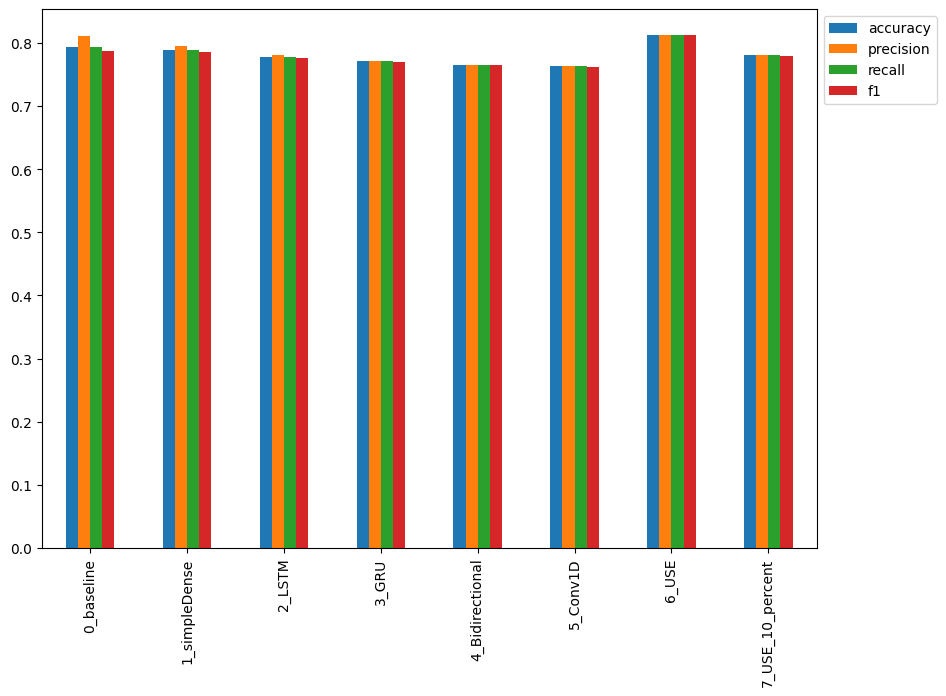

In [158]:
all_models_results.plot(kind="bar",figsize=(10,7)).legend(bbox_to_anchor=(1.0,1.0))

<Axes: >

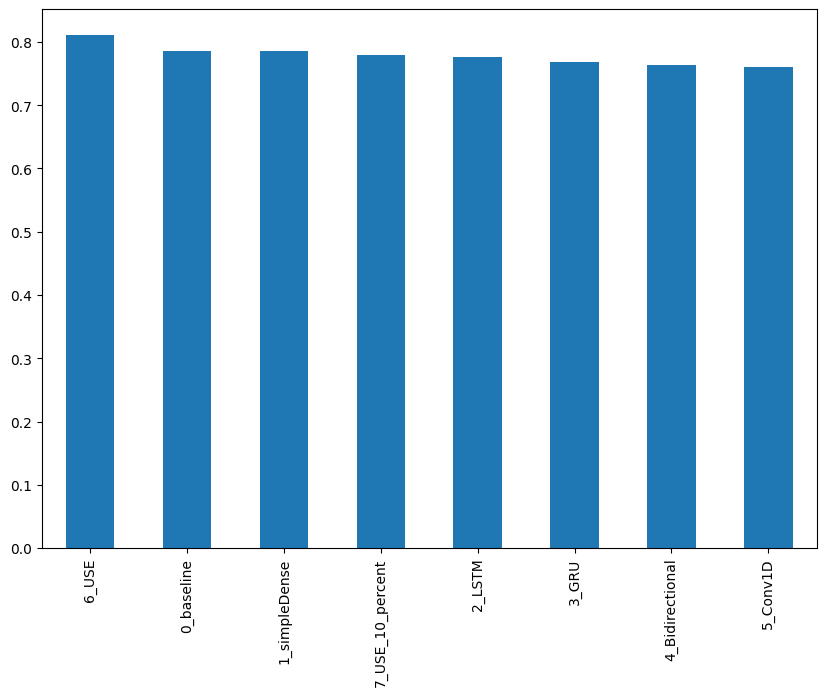

In [163]:
#sort model results by f1 score
all_models_results.sort_values("f1",ascending=False)["f1"].plot(kind="bar",figsize=(10,7))

In [166]:
#Uploading model logs to Tensorboard
!tensorboard dev upload --logdir ./model_logs/ \
--name "NLP modelling experiments"\
--description "A vivid comparison of different NLP models on a binary Text classification Kaggle dataset"\
--one_shot

2023-08-10 04:14:52.831498: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./model_logs/

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) yes

To sign in with the TensorBoard uploader:

1. On your computer or phone, visit:

   https://www.google.com/device

2. Sign in with your Google account, then enter:

   CFR-NTF-DGJ

CFR-NTF-DGJ


New experiment created. View your TensorBoard at: https://tensorboar

In [167]:
#Saving and loading a tensorflow model
model_6.save("model_6.h5")

In [168]:
#Load the model
loaded_model_6=tf.keras.models.load_model("model_6.h5",
                                          custom_objects={"KerasLayer":hub.KerasLayer})

In [169]:
loaded_model_6.evaluate(val_sentences,val_labels)

24/24 [==============================] - 1s 18ms/step - loss: 0.4288 - accuracy: 0.8123


[0.4288386404514313, 0.8123359680175781]

In [170]:
model_6.save("model_6_SavedModel_format")

In [171]:
loaded_model_6_savedModel_format=tf.keras.models.load_model("model_6_SavedModel_format")

In [173]:
loaded_model_6_savedModel_format.evaluate(val_sentences,val_labels)

24/24 [==============================] - 1s 15ms/step - loss: 0.4288 - accuracy: 0.8123


[0.4288386404514313, 0.8123359680175781]

In [175]:
#download pretrained model
!wget https://storage.googleapis.com/ztm_tf_course/08_model_6_USE_feature_extractor.zip
!unzip 08_model_6_USE_feature_extractor.zip

--2023-08-10 04:43:52--  https://storage.googleapis.com/ztm_tf_course/08_model_6_USE_feature_extractor.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.128, 173.194.202.128, 173.194.203.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 960779165 (916M) [application/zip]
Saving to: ‘08_model_6_USE_feature_extractor.zip.1’

08_model_6_USE_feat 100%[===================>] 916.27M  21.4MB/s    in 21s     

2023-08-10 04:44:12 (44.6 MB/s) - ‘08_model_6_USE_feature_extractor.zip.1’ saved [960779165/960779165]

Archive:  08_model_6_USE_feature_extractor.zip
   creating: 08_model_6_USE_feature_extractor/
   creating: 08_model_6_USE_feature_extractor/assets/
   creating: 08_model_6_USE_feature_extractor/variables/
  inflating: 08_model_6_USE_feature_extractor/variables/variables.data-00000-of-00001  
  inflating: 08_model_6_USE_feature_extractor/variables/varia

In [177]:
#finding the most wrong examples
model_6_pretrained=tf.keras.models.load_model("08_model_6_USE_feature_extractor")
model_6_pretrained.evaluate(val_sentences,val_labels)

24/24 [==============================] - 1s 18ms/step - loss: 0.4272 - accuracy: 0.8163


[0.42723119258880615, 0.8162729740142822]

In [178]:
model_6_pretrained_pred_probs=model_6_pretrained.predict(val_sentences)
model_6_pretrained_preds=tf.squeeze(tf.round(model_6_pretrained_pred_probs))
model_6_pretrained_preds[:10]

24/24 [==============================] - 1s 18ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [180]:
#create a dataframe with validation sentences and best performing model predictions
val_df=pd.DataFrame({"text":val_sentences,
                     "target":val_labels,
                     "pred":model_6_pretrained_preds,
                     "pred_prob":tf.squeeze(model_6_pretrained_pred_probs)})
val_df.head()

,text,target,pred,pred_prob
0,DFR EP016 Monthly Meltdown - On Dnbheaven 2015...,0,0.0,0.159757
1,FedEx no longer to transport bioterror germs i...,0,1.0,0.747162
2,Gunmen kill four in El Salvador bus attack: Su...,1,1.0,0.988749
3,@camilacabello97 Internally and externally scr...,1,0.0,0.196229
4,Radiation emergency #preparedness starts with ...,1,1.0,0.707808


In [184]:
most_wrong=val_df[val_df["target"]!=val_df["pred"]].sort_values("pred_prob",ascending=False)
most_wrong.head()#false positive

,text,target,pred,pred_prob
31,? High Skies - Burning Buildings ? http://t.co...,0,1.0,0.910196
759,FedEx will no longer transport bioterror patho...,0,1.0,0.876982
628,@noah_anyname That's where the concentration c...,0,1.0,0.852300
209,Ashes 2015: AustraliaÛªs collapse at Trent Br...,0,1.0,0.835455
251,@AshGhebranious civil rights continued in the ...,0,1.0,0.827213


In [185]:
most_wrong.tail()#flase negative

,text,target,pred,pred_prob
411,@SoonerMagic_ I mean I'm a fan but I don't nee...,1,0.0,0.043918
233,I get to smoke my shit in peace,1,0.0,0.042087
38,Why are you deluged with low self-image? Take ...,1,0.0,0.038998
244,Reddit Will Now QuarantineÛ_ http://t.co/pkUA...,1,0.0,0.038949
23,Ron &amp; Fez - Dave's High School Crush https...,1,0.0,0.037186


In [186]:
for row in most_wrong[:10].itertuples():#false positives
  _,text,target,pred,pred_prob=row
  print(f"Target:{target}, Pred:{pred} ,Prob:{pred_prob}")
  print(f"Text:\n{text}\n")
  print(f"----\n")

Target:0, Pred:1.0 ,Prob:0.9101957082748413
Text:
? High Skies - Burning Buildings ? http://t.co/uVq41i3Kx2 #nowplaying

----

Target:0, Pred:1.0 ,Prob:0.8769820332527161
Text:
FedEx will no longer transport bioterror pathogens in wake of anthrax lab mishaps http://t.co/lHpgxc4b8J

----

Target:0, Pred:1.0 ,Prob:0.8523001670837402
Text:
@noah_anyname That's where the concentration camps and mass murder come in. 
 
EVERY. FUCKING. TIME.

----

Target:0, Pred:1.0 ,Prob:0.835454523563385
Text:
Ashes 2015: AustraliaÛªs collapse at Trent Bridge among worst in history: England bundled out Australia for 60 ... http://t.co/t5TrhjUAU0

----

Target:0, Pred:1.0 ,Prob:0.8272131681442261
Text:
@AshGhebranious civil rights continued in the 60s. And what about trans-generational trauma? if anything we should listen to the Americans.

----

Target:0, Pred:1.0 ,Prob:0.8148159384727478
Text:
@SonofLiberty357 all illuminated by the brightly burning buildings all around the town!

----

Target:0, Pred:1

In [187]:
for row in most_wrong[:-10].itertuples():#false negatives
  _,text,target,pred,pred_prob=row
  print(f"Target:{target}, Pred:{pred} ,Prob:{pred_prob}")
  print(f"Text:\n{text}\n")
  print(f"----\n")

Target:0, Pred:1.0 ,Prob:0.9101957082748413
Text:
? High Skies - Burning Buildings ? http://t.co/uVq41i3Kx2 #nowplaying

----

Target:0, Pred:1.0 ,Prob:0.8769820332527161
Text:
FedEx will no longer transport bioterror pathogens in wake of anthrax lab mishaps http://t.co/lHpgxc4b8J

----

Target:0, Pred:1.0 ,Prob:0.8523001670837402
Text:
@noah_anyname That's where the concentration camps and mass murder come in. 
 
EVERY. FUCKING. TIME.

----

Target:0, Pred:1.0 ,Prob:0.835454523563385
Text:
Ashes 2015: AustraliaÛªs collapse at Trent Bridge among worst in history: England bundled out Australia for 60 ... http://t.co/t5TrhjUAU0

----

Target:0, Pred:1.0 ,Prob:0.8272131681442261
Text:
@AshGhebranious civil rights continued in the 60s. And what about trans-generational trauma? if anything we should listen to the Americans.

----

Target:0, Pred:1.0 ,Prob:0.8148159384727478
Text:
@SonofLiberty357 all illuminated by the brightly burning buildings all around the town!

----

Target:0, Pred:1

In [197]:
test_sentences=test_df["text"].to_list()
test_samples=random.sample(test_sentences,10)
for test_sample in test_samples:
  pred_prob=tf.squeeze(model_6_pretrained.predict([test_sample]))
  pred=tf.round(pred_prob)
  print(f"Pred:{int(pred)},Prob:{pred_prob}")
  print(f"Text:\n{test_sample}\n")
  print("----\n")

1/1 [==============================] - 0s 45ms/step
Pred:1,Prob:0.9670037031173706
Text:
NAVY SAYS LT CMDR WHO FIRED SIDEARM IN DEFENSE DURING NOSC CHATTANOOGA TERRORIST ATTACK WILL NOT FACE CHARGES... http://t.co/vCcDKC4qt2

----

1/1 [==============================] - 0s 45ms/step
Pred:0,Prob:0.12003905326128006
Text:
@bruminthecity oh no what coffee was it espresso? poss casualty of today's busiest thurs ever. come in for a perfect coffee - on the house.

----

1/1 [==============================] - 0s 42ms/step
Pred:1,Prob:0.6193271279335022
Text:
the fires of hell for Julie #Extant writers....she better go down in flames when this is all over...#Extant

----

1/1 [==============================] - 0s 59ms/step
Pred:0,Prob:0.1589367389678955
Text:
OMg zombie apocalypse among my students... -___-

----

1/1 [==============================] - 0s 60ms/step
Pred:0,Prob:0.1262054741382599
Text:
@YoungHeroesID Lava Blast &amp; Power Red &amp; Mix Fruit. @Niastewart3 @NRmawa #PantherAttac

In [208]:
prediction=(model_6_pretrained.predict(["100 people celebrate the fire works"]))
int(tf.squeeze(tf.round(prediction)))

1/1 [==============================] - 0s 104ms/step


0

In [209]:
prediction=(model_6_pretrained.predict(["100 people burnt by fire works"]))
int(tf.squeeze(tf.round(prediction)))

1/1 [==============================] - 0s 69ms/step


1

In [210]:
#speed/score tradeoff
model_6_results

{'accuracy': 81.23359580052494,
 'precision': 0.812763224356635,
 'recall': 0.8123359580052494,
 'f1': 0.8115121319063344}

In [211]:
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

In [212]:
#function to calculate time taken for a prediction
import time
def pred_timer(model,samples):
  start_time=time.perf_counter()#getting start time
  model.predict(samples)
  end_time=time.perf_counter()#get finish time
  total_time=end_time-start_time
  time_per_pred=total_time/len(samples)
  return total_time,time_per_pred

In [213]:
model_6_total_pred_time,model_6_time_per_pred=pred_timer(model_6_pretrained,val_sentences)
model_6_total_pred_time,model_6_time_per_pred

24/24 [==============================] - 1s 29ms/step


(1.4376098770007957, 0.0018866271351716478)

In [215]:
baseline_total_pred_time,baseline_time_per_pred=pred_timer(model_0,val_sentences)
baseline_total_pred_time,baseline_time_per_pred

(0.13038094299918157, 0.00017110359973645874)

Text(0, 0.5, 'F1 score')

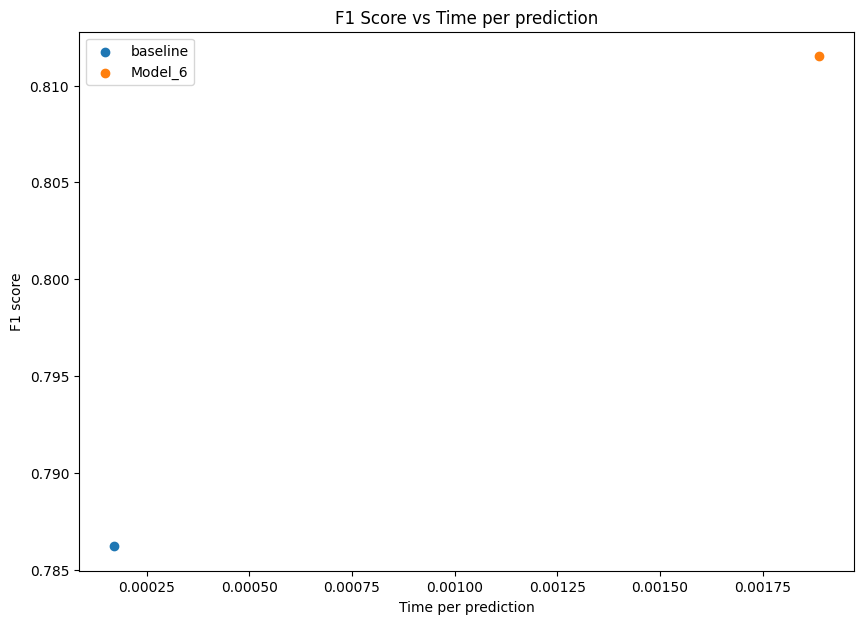

In [218]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.scatter(baseline_time_per_pred,baseline_results["f1"],label="baseline")
plt.scatter(model_6_time_per_pred,model_6_results["f1"],label="Model_6")
plt.legend()
plt.title("F1 Score vs Time per prediction")
plt.xlabel("Time per prediction")
plt.ylabel("F1 score")